In [66]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [68]:
lead=pd.read_csv('/content/Leads_TimeSeries_Oye!.csv',date_parser=dateparse)

In [69]:
lead.drop('lead_source',axis=1,inplace=True)

**PROPHET MODEL**

In [70]:
import fbprophet

In [71]:
from fbprophet import Prophet


In [72]:
lead.head(20)

,date,count
0,2020-06-01,1
1,2020-06-01,16
2,2020-06-01,29
3,2020-06-01,12
4,2020-06-02,26
5,2020-06-02,3
6,2020-06-02,1
7,2020-06-02,16
8,2020-06-02,10
9,2020-06-02,1


In [73]:
lead=lead[(lead['date']>='2021-01-01') & (lead['date']<='2021-04-15')]

In [74]:
lead.head()

,date,count
854,2021-01-01,5
855,2021-01-01,13
856,2021-01-01,1
857,2021-01-02,9
858,2021-01-02,4


In [75]:
data=lead.groupby('date').sum()['count'].reset_index()


In [76]:
data

,date,count
0,2021-01-01,19
1,2021-01-02,29
2,2021-01-03,18
3,2021-01-04,198
4,2021-01-05,32
...,...,...
100,2021-04-11,13
101,2021-04-12,32
102,2021-04-13,37
103,2021-04-14,37


In [77]:
data.columns=['ds','y']


In [78]:
model=Prophet(interval_width=0.95)


In [79]:
model.fit(data)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
future=model.make_future_dataframe(periods=100)


In [81]:
future

,ds
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
200,2021-07-20
201,2021-07-21
202,2021-07-22
203,2021-07-23


In [82]:
pred=model.predict(future)


In [83]:
pred


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,60.474451,-37.315412,195.609538,60.474451,60.474451,14.350627,14.350627,14.350627,14.350627,14.350627,14.350627,0.0,0.0,0.0,74.825078
1,2021-01-02,60.565150,-37.173666,168.935109,60.565150,60.565150,3.562210,3.562210,3.562210,3.562210,3.562210,3.562210,0.0,0.0,0.0,64.127360
2,2021-01-03,60.655849,-63.596405,150.789040,60.655849,60.655849,-15.609116,-15.609116,-15.609116,-15.609116,-15.609116,-15.609116,0.0,0.0,0.0,45.046733
3,2021-01-04,60.746548,-42.429020,169.287434,60.746548,60.746548,5.986234,5.986234,5.986234,5.986234,5.986234,5.986234,0.0,0.0,0.0,66.732782
4,2021-01-05,60.837247,-50.880817,156.173078,60.837247,60.837247,-12.313375,-12.313375,-12.313375,-12.313375,-12.313375,-12.313375,0.0,0.0,0.0,48.523871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2021-07-20,76.360284,-40.445319,172.569522,75.874664,76.848461,-12.313375,-12.313375,-12.313375,-12.313375,-12.313375,-12.313375,0.0,0.0,0.0,64.046908
201,2021-07-21,76.434162,-42.315701,181.431842,75.937474,76.933364,-13.647942,-13.647942,-13.647942,-13.647942,-13.647942,-13.647942,0.0,0.0,0.0,62.786220
202,2021-07-22,76.508039,-3.291706,200.296496,76.001116,77.018294,17.671363,17.671363,17.671363,17.671363,17.671363,17.671363,0.0,0.0,0.0,94.179402
203,2021-07-23,76.581917,-19.656026,196.824577,76.065464,77.100174,14.350627,14.350627,14.350627,14.350627,14.350627,14.350627,0.0,0.0,0.0,90.932544


In [84]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
200,2021-07-20,64.046908,-40.445319,172.569522
201,2021-07-21,62.786220,-42.315701,181.431842
202,2021-07-22,94.179402,-3.291706,200.296496
203,2021-07-23,90.932544,-19.656026,196.824577
204,2021-07-24,80.218005,-22.129841,183.531672


In [85]:
pred[['ds','yhat','yhat_lower','yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,74.825078,-37.315412,195.609538
1,2021-01-02,64.127360,-37.173666,168.935109
2,2021-01-03,45.046733,-63.596405,150.789040
3,2021-01-04,66.732782,-42.429020,169.287434
4,2021-01-05,48.523871,-50.880817,156.173078


In [86]:
data.index=data['ds']

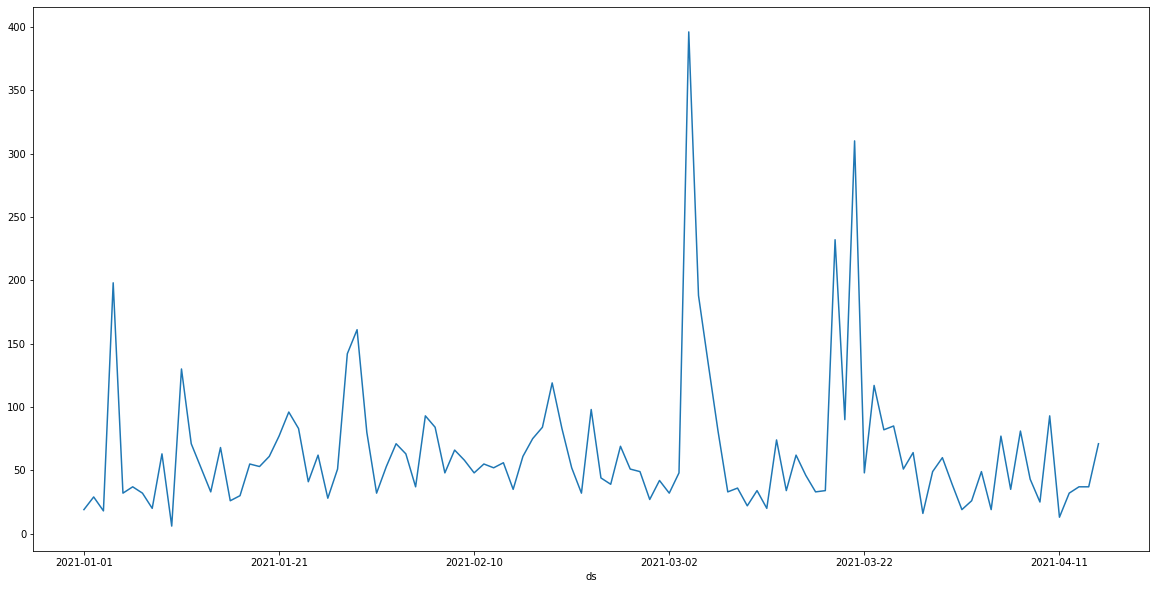

In [87]:
data['y'].plot(figsize=(20,10))


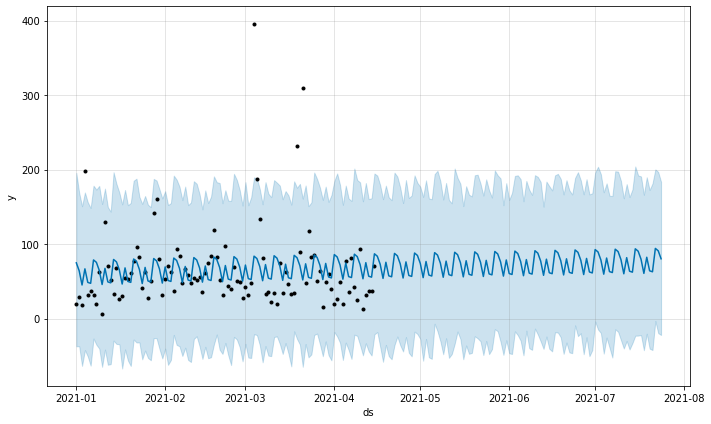

In [88]:
data_forecast=model.plot(pred)


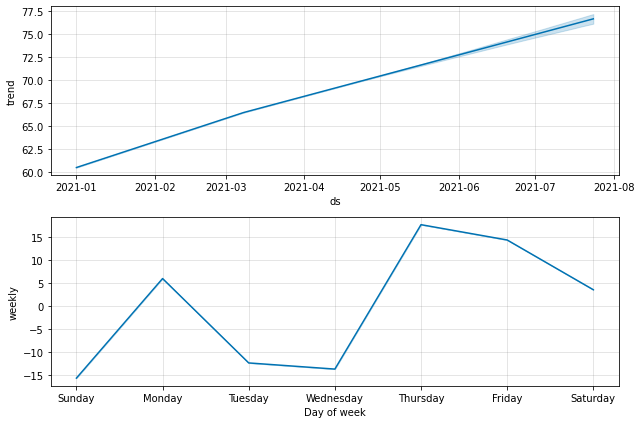

In [89]:
data_forecast_plot=model.plot_components(pred)


In [90]:
pred.to_csv('Prophet_Jan_Apr.csv')